In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
data_path = "data/data_complete.csv"
import pandas as pd

data = pd.read_csv(data_path)
data = data.iloc[:, 2:]
# data.corr()

In [310]:
import DataLoader, Machine_Model, Engine, Information
import torch

train_percent = 0.7
val_percent = 0.3
test_percent = None
batch_size = 100

dataloader = DataLoader.MyDataloader(file_path=data_path, train_percent=train_percent, val_percent=val_percent,
                                     test_percent=test_percent, batch_size=batch_size)
train, val, test = dataloader.fit()

try:
    print(len(train), len(val), len(test))
except:
    print(len(train), len(val))

# INPUT_SIZE = len(Information.features)
INPUT_SIZE = 1
HIDDEN_UNITS = 18
OUTPUT_SIZE = 1
DEPTH = 4

model0 = Machine_Model.LSTM_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=3, depth_number=DEPTH)

model1 = Machine_Model.NN_V0(input_size=11, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE)

EPOCHS = 1200
loss_fn = torch.nn.MSELoss()
learning_rate = 0.032
optimizer = torch.optim.Adam(model0.parameters(), learning_rate)
optimizer1 = torch.optim.Adam(model1.parameters(), learning_rate, weight_decay=0.0085)

engine = Engine.Machine_Engine(model=model0, model1=model1, train_dataloader=train, val_dataloader=val,
                               test_dataloader=test)
model0_results = engine.train(loss_fn=loss_fn, optimizer=optimizer, optimizer1=optimizer1, epochs_num=EPOCHS,
                              early_stop_patience=None, writer=False, resolution=1)



1 1


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch 1 | train: Loss 0.842343 Accuracy -29.8916 | validation: Loss 0.525725 Accuracy -32.0276
Epoch 2 | train: Loss 0.275760 Accuracy -9.1131 | validation: Loss 0.108266 Accuracy -5.8016
Epoch 3 | train: Loss 0.039374 Accuracy -0.4440 | validation: Loss 0.904756 Accuracy -55.8394
Epoch 4 | train: Loss 0.272322 Accuracy -8.9870 | validation: Loss 0.494276 Accuracy -30.0519
Epoch 5 | train: Loss 0.104029 Accuracy -2.8151 | validation: Loss 0.187222 Accuracy -10.7618
Epoch 6 | train: Loss 0.040547 Accuracy -0.4870 | validation: Loss 0.069606 Accuracy -3.3728
Epoch 7 | train: Loss 0.031669 Accuracy -0.1614 | validation: Loss 0.048678 Accuracy -2.0581
Epoch 8 | train: Loss 0.037854 Accuracy -0.3882 | validation: Loss 0.052053 Accuracy -2.2701
Epoch 9 | train: Loss 0.041976 Accuracy -0.5394 | validation: Loss 0.050244 Accuracy -2.1565
Epoch 10 | train: Loss 0.040068 Accuracy -0.4694 | validation: Loss 0.041280 Accuracy -1.5933
Epoch 11 | train: Loss 0.033579 Accuracy -0.2314 | validation: L

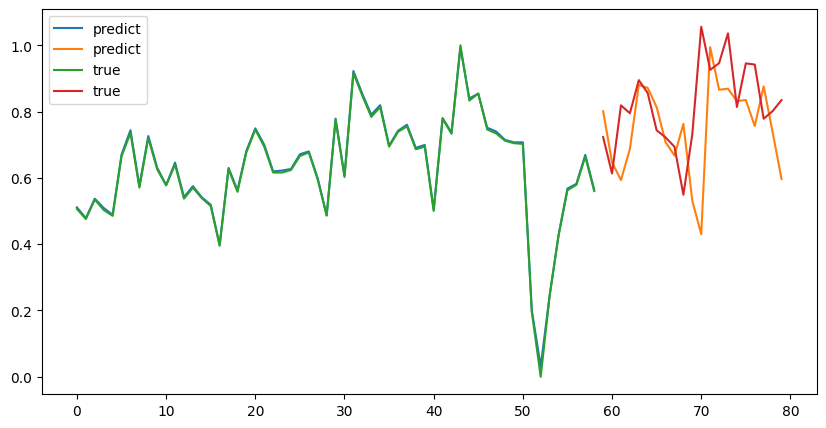

In [311]:
engine.plot_predict_real()

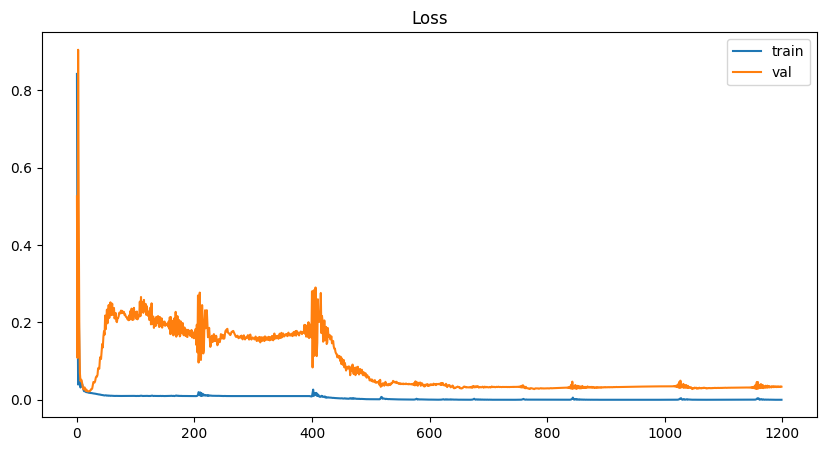

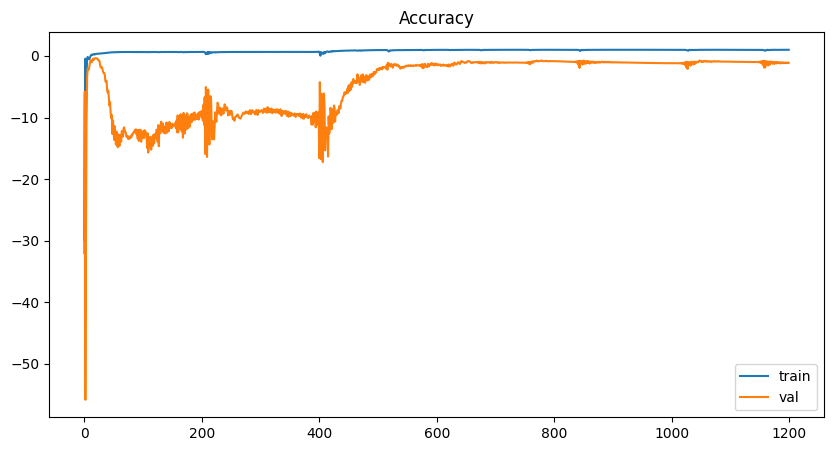

In [312]:
engine.plot_loss()
engine.plot_acc()

In [313]:
engine.save()

In [318]:
test_loss, test_acc, true_predict_list = engine.test(loss_fn=loss_fn)
test_acc

[!!!IMPORTANT NOTE!!!]
The test_function provided here is intended solely for the final model analysis and reporting purposes.
Please refrain from using it as a general-purpose function in your own projects. Always refer to
the appropriate train and validation data for developing and fine-tuning your own models.
[INFO] There is no test in your data


ValueError: 

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=runs

In [319]:
dd = dataloader.val_dataloader

In [320]:
for x, y in dd:
    x2, y2 = x, y

In [321]:
x2 = x2[-6, :, :]

In [322]:
dataloader.scaler_x.inverse_transform(x2)

array([[  2869.9999578 ,   5751.00000989,   5714.00015974,
        591907.98618531,   9468.00025457, 153304.00005625,
         51022.00059062,   3440.99993515,      0.        ],
       [  2780.00008225,   5751.00000989,   5714.00015974,
        591907.98618531,   9468.00025457, 153304.00005625,
         51022.00059062,   3440.99993515,      0.        ],
       [  2318.99996436,   4638.99992132,   4270.00006247,
        822596.98602057,   9487.00000024, 208977.00185978,
         47242.99985173,   2312.00004625,      0.        ],
       [  2901.00005841,   4638.99992132,   4270.00006247,
        822596.98602057,   9487.00000024, 208977.00185978,
         47242.99985173,   2312.00004625,      0.        ],
       [  3933.0000999 ,   4638.99992132,   4270.00006247,
        822596.98602057,   9487.00000024, 208977.00185978,
         47242.99985173,   2312.00004625,      0.        ],
       [  3518.99995077,   4638.99992132,   4270.00006247,
        822596.98602057,   9487.00000024, 208977.00

In [323]:
import numpy as np
x3 = np.array([[2870, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
      [2780, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
      [2319, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
      [2901, 5751, 5714, 591908, 9468, 153304, 51022, 3441, 0],
      [3933, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
      [3519, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
      [3583, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0],
      [3870, 4639, 4270, 822597, 9468, 208977, 47243, 2312, 0]])


In [324]:
x3.shape

(8, 9)

In [325]:
engine.predict(x3, dataloader.scaler_y, dataloader.scaler_x, n=8)

<bound method Machine_Engine.predict of <Engine.Machine_Engine object at 0x000002E357919E90>>

In [326]:
engine.prediction


,y,number_of_person_car_outside,number_of_travels_car_outside,number_of_person_bus_outside,number_of_travels_minibus_inside,number_of_person_bus_inside,number_of_travels_bus_outside,number_of_travels_minibus_outside,covid,y
0,3870.000000,4639.0,4270.0,822597.0,9468.0,208977.0,47243.0,2312.0,0.0,3218.626465
0,3218.626465,4639.0,4270.0,822597.0,9468.0,208977.0,47243.0,2312.0,0.0,3251.222412
0,3251.222412,4639.0,4270.0,822597.0,9468.0,208977.0,47243.0,2312.0,0.0,2746.002441
0,2746.002441,4639.0,4270.0,822597.0,9468.0,208977.0,47243.0,2312.0,0.0,2809.262695
0,2809.262695,4639.0,4270.0,822597.0,9468.0,208977.0,47243.0,2312.0,0.0,2459.323486
0,2459.323486,4639.0,4270.0,822597.0,9468.0,208977.0,47243.0,2312.0,0.0,2477.087402
0,2477.087402,4639.0,4270.0,822597.0,9468.0,208977.0,47243.0,2312.0,0.0,887.646118
0,887.646118,4639.0,4270.0,822597.0,9468.0,208977.0,47243.0,2312.0,0.0,1063.342529
